# Entropía

https://www.youtube.com/watch?v=2s3aJfRr9gE

La entropía de una distribución es la mínima cantidad de preguntas promedio que tengo que hacer para conocer el resultado de ensayar una variable aleatoria.

Si las preguntas son binarias (Si el resultado pertenece al subespacio muestreal A o al subespacio muestreal B), se mide en bits.

Si las preguntas son ternarias (Si el resultado pertenece al subespacio muestreal A, B o C, se mide en trits).

Analicemos en el pizarrón tres fuentes de símbolos A, B, C y D con las siguientes distribuciones:

In [52]:
% load_ext autoreload
% autoreload 2
import sys
sys.path.append('./src')
import helper
import numpy as np
from matplotlib import pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [48]:
#dist={'A':0.25,'B':0.25,'C':0.25,'D':0.25} #defino la distribución a analizar
dist={'A':0.5,'B':0.25,'C':0.125,'D':0.125} 
#dist={'A':0.97,'B':0.01,'C':0.01,'D':0.01} 

Se puede demostrar que la entropía es:

$$H(p)=\sum_{k \in K} p_k \log\frac{1}{p_k}=-\sum_{k \in K} p_k \log{p_k}$$

donde $\log{p_k}$ corresponde a la cantidad de preguntas necesarias en el caso de que el valor de la variable aleatoria sea $k$.

$p_k$ representa la probabilidad de tener que realizar esas $\log{p_k}$ preguntas.

Por lo tanto $H$ es la cantidad de preguntas promedio que uno tiene que realizar para conocer el valor de k, dado que se ensayó la variable aleatoria.

Veamos cuánto vale la entropía para las distribuciones planteadas anteriormente.

In [53]:
helper.entropy(dist)

1.75

## Arboles de Huffman

Se puede demostrar que el árbol de Huffman es la implementación óptima de preguntas binarias que se deben realizar para conocer el símbolo generado.  
El algoritmo de construcción del árbol puede resumirse así:

* Crear un nodo hoja para cada símbolo, asociando un peso según su frecuencia de aparición e insertarlo en la lista ordenada ascendentemente.
* Mientras haya más de un nodo en la lista:
    * Eliminar los dos nodos con menor probabilidad de la lista.
    * Crear un nuevo nodo interno que enlace a los nodos anteriores, asignándole como peso la suma de los pesos de los nodos hijos.
    * Insertar el nuevo nodo en la lista, (en el lugar que le corresponda según el peso).
* El nodo que quede es el nodo raíz del árbol.

Construyamos en el pizarrón los árboles de Huffman pertenecientes a cada una de las distribuciones anteriores.


In [73]:
#dist={'A':0.25,'B':0.25,'C':0.25,'D':0.25} #defino la distribución a analizar
dist={'A':0.5,'B':0.25,'C':0.125,'D':0.125} 
#dist={'A':0.97,'B':0.01,'C':0.01,'D':0.01} 
#dist={'A':0.75,'B':0.25} 
# Implementación del árbol de Huffman 
tree=helper.huffman(dist)
print(tree) #Imprimo el árbolde Huffman
helper.entropy(dist)

{'A': '0', 'B': '10', 'C': '110', 'D': '111'}


1.75

Nos podemos acercar mas hacia el mínimo de preguntas, definido por la entropía, tomando los símbolos de a 2, 3, 4 etc:

Average code length: 1.75
Entropy per symbol: 1.75
Average code length: 1.75
Entropy per symbol: 1.75
Average code length: 1.75
Entropy per symbol: 1.75
Average code length: 1.75
Entropy per symbol: 1.7499999951213496
Average code length: 1.75
Entropy per symbol: 1.7499999754375763


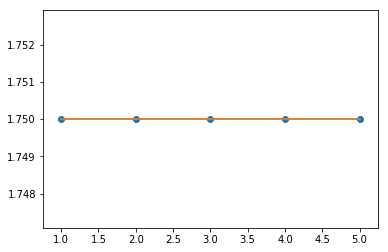

In [79]:
pregs=6
aux=dist.copy()
acl_list=list()
entropy_list=list()
for idx in range(1,pregs):
    tree=helper.huffman(aux)
    acl=0
    for key,value in tree.items():
        acl += len(value)*aux[key]/len(key)
    acl=np.around(acl,decimals=2)
    print("Average code length: {}".format(acl))
    key=list(aux.keys())[0]
    print("Entropy per symbol: {}".format(helper.entropy(aux)/len(key)))
    acl_list.append(acl)
    entropy_list.append(helper.entropy(dist))
    aux=helper.combine(aux,dist)
plt.plot(range(1,pregs),acl_list)
plt.scatter(range(1,pregs),acl_list)
plt.plot(range(1,pregs),entropy_list)
plt.show()

# Entropía cruzada

Es la cantidad de preguntas mínima promedio que debo hacer para conocer el valor del ensayo de una variable aleatoria con distribución p, pero si la modelo con una distribución q.

$$H(p,q)=\sum_{k \in K} p_k \log\frac{1}{q_k}=-\sum_{k \in K} p_k \log{q_k}= H(p) + D(p||q)$$

$D(p||q)$: divergencia Kullback–Leibler

$$D(p||q)=\sum_{k \in K}p_k\log\frac{p_k}{q_k}$$

Nótese que cuando q y p son iguales la divergencia KL vale cero.
La divergencia KL da una idea de "distancia" entre las dos distribuciones. Formalmente no es una distancia porque $D(p||q) \neq D(q||p)$.
